**Problem 1**

In this problem, you will learn how to perform linear regression using the matrix method.  The file `Riggs.dat` contains hypothetical particle-physics spectral data (energy vs counts) of a search for a new particle called the *Riggs boson*.  The columns are 1) energy $E$ (GeV) and 2) counts $N$ (number of events in that energy bin).  The energy bins are independent (i.e., there is no covariance).
  
```
   1.0   277
   2.0   254
   3.0   252
   4.0   265
   5.0   266
   6.0   266
   ...
```

  
A signal of a new particle consists of a gaussian on top of a smooth background.  Model the spectrum with a function given by:
$$
  N(E) = a + bE +cE^2 + Ae^{-(E-E_{\mathrm{Riggs}})^2/(2\sigma_E^2)}
$$
where $a,b,c,$ and $A$ are 4 fit parameters.  The first three terms make up the background, the last term represents the signal.  The term $\sigma_E$ represents the intrinsic energy width of the particle and is assumed to be $2.6$ GeV.  Theory also predicts that $E_{\mathrm{Riggs}} = 68.8$ GeV.


a) (4 pts) Given our data and model, construct the design matrix $\mathbf{G}$, data covariance matrix $\mathbf{S}$, and response vector $\mathbf{D}$.

b) (4 pts) Use the matrix operations to solve for the best-fit parameter vector $\hat{\mathbf{A}}$ given by:
$$
\mathbf{\hat{A}} = (\mathbf{G}^T \mathbf{S}^{-1} \mathbf{G)^{-1}} \mathbf{G}^T \mathbf{S}^{-1} \mathbf{D}
$$
and their uncertainties.

c) (2 pts) Plot the data and superimpose the best-fit model.

In [28]:
import numpy as np
import pandas as pd  # You don't need to use this if you don't want.

# Problem 1a
def read_riggs_data(n):
    """
    Read the data file Riggs.dat.
    
    Returns E, N for this run as numpy arrays
    """
    # Hint: If you use pandas to read the file, to_numpy() will convert to a numpy array

    data = pd.read_csv('Riggs.dat', delim_whitespace=True, header=None)
    E = data[0].to_numpy()
    N = data[1].to_numpy()
    return E, N
    
def construct_design_matrix(E, E_Riggs=68.6, sigma_E=2.6):
    """Construct the design matrix for the Riggs boson model.
    
    The columns are [1, E, E^2, exp(-(E-E_Riggs)^2) / 2sigma_E^2]
    
    Each row corresponds to the values of the input E vector.
    
    Returns G, the design matrix.
    """
    G = np.column_stack([
        np.ones_like(E),        
        E,                           
        E**2,                       
        np.exp(-(E - E_Riggs)**2 / (2 * sigma_E**2)) 
    ])
    return G
    
def construct_data_covariance_matrix(N):
    """Construct the data vector and the covariance matrix for the given counts.
    
    The counts are taken to be independent with Poisson errors.
    
    Returns D, S, the data vector and its covariance matrix.
    """
    D = N  
    S = np.diag(N) 
    return D, S



In [30]:
E, N = read_riggs_data(0)

print('First few E,N are:')
print(E[0:3])
print(N[0:3])

G = construct_design_matrix(E)
print('Start of design matrix:')
print(G[0:3])

D, S = construct_data_covariance_matrix(N)
print('Start of data vector:')
print(D[0:3])
print('Upper left of covariance matrix:')
print(S[0:3,0:3])


First few E,N are:
[1. 2. 3.]
[277 254 252]
Start of design matrix:
[[1.00000000e+000 1.00000000e+000 1.00000000e+000 1.61608841e-147]
 [1.00000000e+000 2.00000000e+000 4.00000000e+000 3.30588364e-143]
 [1.00000000e+000 3.00000000e+000 9.00000000e+000 5.83264122e-139]]
Start of data vector:
[277 254 252]
Upper left of covariance matrix:
[[277   0   0]
 [  0 254   0]
 [  0   0 252]]


C:\Users\flash\AppData\Local\Temp\ipykernel_16988\2317540395.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('Riggs.dat', delim_whitespace=True, header=None)


In [22]:
# Problem 1b

def riggs_model(E, params, E_Riggs=68.6, sigma_E=2.6):
    """
    Return the expected counts given the model for the Riggs boson.
    
        N(E) = a + b E + c E**2 + A exp(-(E-E_Riggs)**2/(2 sigma_E**2))
    
    On input, E is an array of energy values.
    And params is [a, b, c, A], an array of the model parameters.
    
    Returns N(E) given the model parameters.
    """
    a, b, c, A = params
    return a + b * E + c * E**2 + A * np.exp(-(E - E_Riggs)**2 / (2 * sigma_E**2))
    
    
def fit_riggs_model(E, N, E_Riggs=68.6, sigma_E=2.6):
    """
    Find the best fit model given the observed data N(E)

    Returns the parameters [a, b, c, A] as a numpy array 
    and the covariance matrix, also as a numpy array.
    """
    # Hints:
    # 1. Use the above equations to get the D vector and G, S matrices.
    # 2. Compute A =(G^T S^−1 G)^−1 G^T S^−1 D using numpy functions
    
    G = construct_design_matrix(E, E_Riggs, sigma_E)
    D, S = construct_data_covariance_matrix(N)
    

    S_inv = np.linalg.inv(S)
    
    GT_Sinv_G = G.T @ S_inv @ G
    GT_Sinv_D = G.T @ S_inv @ D
    A_hat = np.linalg.inv(GT_Sinv_G) @ GT_Sinv_D
    
    cov_matrix = np.linalg.inv(GT_Sinv_G)
    
    return A_hat, cov_matrix

In [24]:
params, cov = fit_riggs_model(E, N)

print('params = ',params)
print('cov = ',cov)

fitted_model = riggs_model(E, params)
print('First few fitten N values:')
print(fitted_model[0:3])


params =  [2.66472053e+02 2.43049676e-01 1.01602227e-01 1.20201807e+02]
cov =  [[ 3.06449981e+01 -1.42574009e+00  1.28226492e-02  9.73056134e+00]
 [-1.42574009e+00  9.07535491e-02 -9.19376830e-04 -6.77774365e-01]
 [ 1.28226492e-02 -9.19376830e-04  1.01662084e-05  3.44527830e-03]
 [ 9.73056134e+00 -6.77774365e-01  3.44527830e-03  2.15458952e+02]]
First few fitten N values:
[266.81670484 267.36456119 268.115622  ]


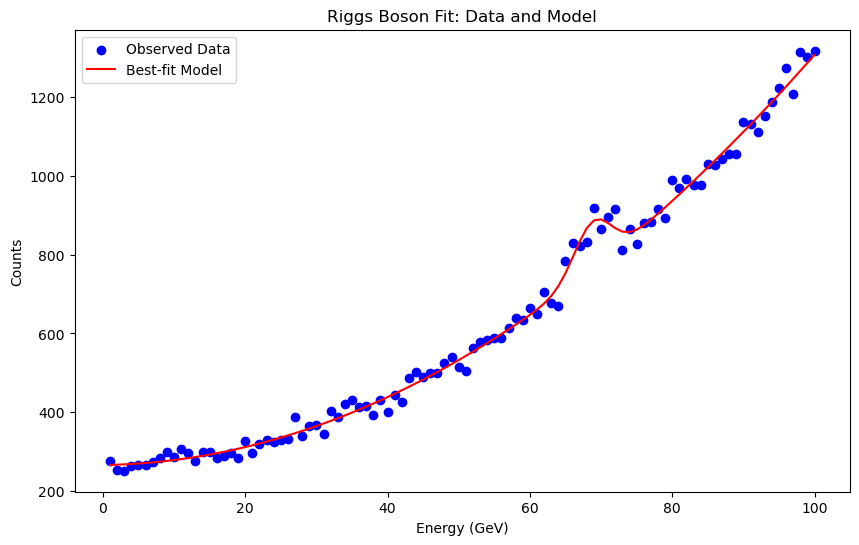

In [26]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data_and_fit(E, N, params, E_Riggs=68.8, sigma_E=2.6):
    """
    Plot the data (E vs N) and the best-fit model.
    
    Parameters:
    - E: Array of energy values.
    - N: Array of observed counts.
    - params: Best-fit parameters [a, b, c, A] from fit_riggs_model.
    """
    N_fit = riggs_model(E, params, E_Riggs, sigma_E)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(E, N, color='blue', label='Observed Data', marker='o')
    plt.plot(E, N_fit, color='red', label='Best-fit Model')
    plt.xlabel('Energy (GeV)')
    plt.ylabel('Counts')
    plt.title('Riggs Boson Fit: Data and Model')
    plt.legend()
    plt.show()

E, N = read_riggs_data('Riggs.dat')
params, _ = fit_riggs_model(E, N)
plot_data_and_fit(E, N, params)

---

**Bonus Problem**

A nice way to visualize the covariance matrix of a fit is to sample values of the parameters that would be consistent with the errors.

1. First take the Cholesky decomposition of the covariance matrix: $L L^{T} = \mathrm{Cov}(\hat A)$
 
2. Then make a vector of 4 zero-mean, unit-variance Gaussian random values: 
$v = [X_0, X_1, X_2, X_3]^T; \quad X_i \leftarrow \cal{N}(0,1)$

3. Multiply them together using matrix math: $\delta \hat{\mathbf{A}} = L v$

This gives you random deviations from the fitted parameter values $\hat{\mathbf{A}}$ according to the appropriate statistics given by the covariance matrix.  You can now plot a bunch of models with parameters $\hat{\mathbf{A}} + \delta \hat{\mathbf{A}}$ to see the range of possible solutions that are plausible given the errors.  Doing this with a small line width (lw) and making them semi-transparent (alpha < 1) provides a nice visualization of the set of possible lines.

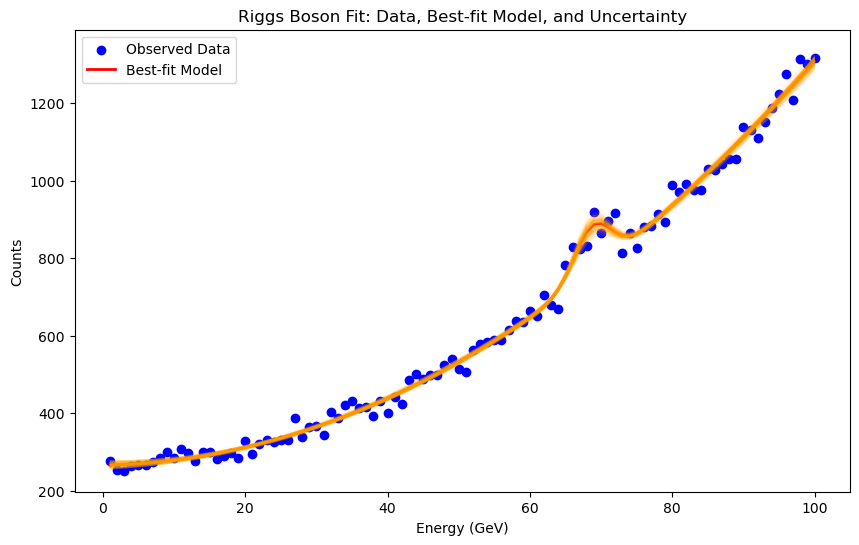

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_with_uncertainty(E, N, params, cov_matrix, E_Riggs=68.8, sigma_E=2.6, num_samples=200):
    """
    Plot the data and best-fit model, with uncertainty bands generated from the covariance matrix.
    
    Parameters:
    - E: Array of energy values.
    - N: Array of observed counts.
    - params: Best-fit parameters [a, b, c, A].
    - cov_matrix: Covariance matrix of the best-fit parameters.
    - E_Riggs, sigma_E: Parameters for the Riggs model.
    - num_samples: Number of samples to visualize the uncertainty.
    """
    # Generate the Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(cov_matrix)
    
    # Calculate the best-fit model
    N_fit = riggs_model(E, params, E_Riggs, sigma_E)
    
    # Plot the observed data
    plt.figure(figsize=(10, 6))
    plt.scatter(E, N, color='blue', label='Observed Data', marker='o')
    
    # Plot the best-fit model
    plt.plot(E, N_fit, color='red', label='Best-fit Model', lw=2)
    
    # Generate and plot models with parameter deviations
    for _ in range(num_samples):
        # Generate random Gaussian deviations
        v = np.random.randn(4)
        delta_params = L @ v
        perturbed_params = params + delta_params
        
        # Calculate the perturbed model
        N_perturbed = riggs_model(E, perturbed_params, E_Riggs, sigma_E)
        
        # Plot the perturbed model with transparency
        plt.plot(E, N_perturbed, color='orange', alpha=0.1, lw=0.5)

    # Labels and title
    plt.xlabel('Energy (GeV)')
    plt.ylabel('Counts')
    plt.title('Riggs Boson Fit: Data, Best-fit Model, and Uncertainty')
    plt.legend()
    plt.show()

params, cov_matrix = fit_riggs_model(E, N)
plot_with_uncertainty(E, N, params, cov_matrix)
